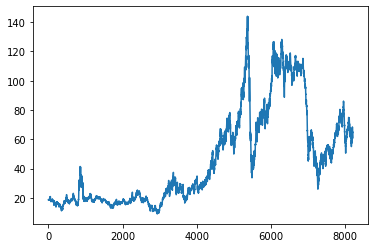

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/BrentOilPrices.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()


In [2]:
dataset

,Price
0,18.63
1,18.45
2,18.55
3,18.60
4,18.63
...,...
8211,64.13
8212,62.41
8213,62.08
8214,62.48


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
# fix random seed for reproducibility
np.random.seed(7)
#Here the seed has been set to 7. When generating a random number, numpy generates a seemingly random number set everytime.
#However, fixing seed to 7 by using the above function fixes it to one single random number irrespective of the times the random funct is used.


In [5]:
dataset1 = dataset.values
dataset1 = dataset.astype('float32')

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1)

In [7]:
# split into train and test sets
train_size = int(len(dataset1) * 0.67)
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset),:]
print(len(train), len(test))

5504 2712


In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset1, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset1)-look_back-1):
		a = dataset1[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset1[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [9]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
# create and fit the LSTM network
#Epochs: It is the number of times the dataset is run through the model. Needs to be appropriate as it leads to themodel over learning, 
#under learning or suitably fitting a dataset.

#batch_size: is full batch here as dataset isn't too large and it gives the most accurate result for all the training examples.
#It nees to be as small as possible without expens=ding the entire memory
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
5502/5502 - 7s - loss: 0.0065 - 7s/epoch - 1ms/step
Epoch 2/100
5502/5502 - 5s - loss: 7.1110e-05 - 5s/epoch - 987us/step
Epoch 3/100
5502/5502 - 5s - loss: 7.1342e-05 - 5s/epoch - 981us/step
Epoch 4/100
5502/5502 - 5s - loss: 6.8979e-05 - 5s/epoch - 981us/step
Epoch 5/100
5502/5502 - 6s - loss: 6.8231e-05 - 6s/epoch - 1ms/step
Epoch 6/100
5502/5502 - 9s - loss: 6.8198e-05 - 9s/epoch - 2ms/step
Epoch 7/100
5502/5502 - 5s - loss: 6.8858e-05 - 5s/epoch - 957us/step
Epoch 8/100
5502/5502 - 5s - loss: 6.6799e-05 - 5s/epoch - 969us/step
Epoch 9/100
5502/5502 - 5s - loss: 6.5548e-05 - 5s/epoch - 973us/step
Epoch 10/100
5502/5502 - 5s - loss: 6.3833e-05 - 5s/epoch - 977us/step
Epoch 11/100
5502/5502 - 6s - loss: 6.2381e-05 - 6s/epoch - 1ms/step
Epoch 12/100
5502/5502 - 5s - loss: 6.1417e-05 - 5s/epoch - 971us/step
Epoch 13/100
5502/5502 - 6s - loss: 5.6942e-05 - 6s/epoch - 1ms/step
Epoch 14/100
5502/5502 - 5s - loss: 5.6596e-05 - 5s/epoch - 976us/step
Epoch 15/100
5502/5502 - 6s -

In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

85/85 [==============================] - 0s 952us/step
Train Score: 1.01 RMSE
Test Score: 1.45 RMSE


In [17]:
"""
We can see that the model has an average error of about $1.01
on the training dataset, and about $1.45 on the test dataset
"""

'\nWe can see that the model has an average error of about $1.01\non the training dataset, and about $1.45 on the test dataset\n'

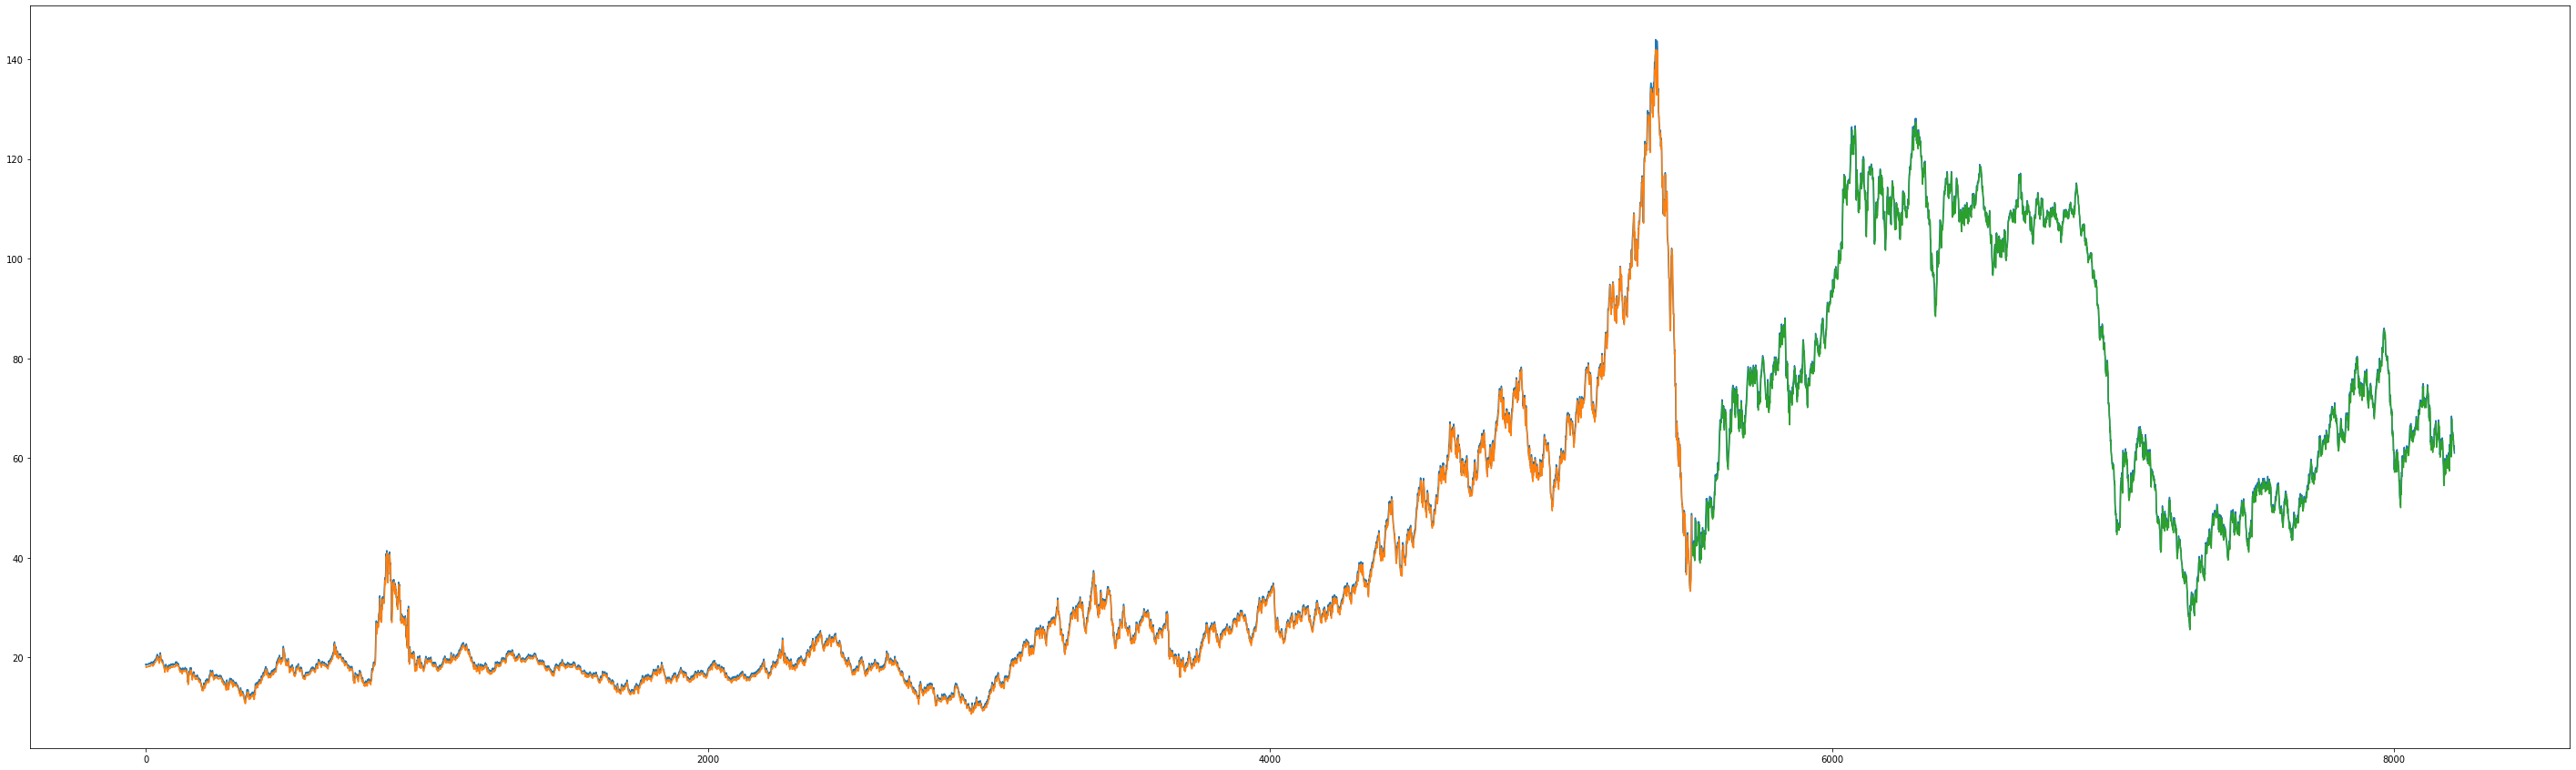

In [15]:
fig, ax = plt.subplots(figsize=(50,15))
# shift train predictions for plotting
trainPredictPlot= np.empty_like(dataset1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset1)-1, :] = testPredict
# plot baseline and predictions
ax.plot(scaler.inverse_transform(dataset1),label='original dataset ')  #blue
ax.plot(trainPredictPlot, label='predictions for the training dataset')   #orange
ax.plot(testPredictPlot, label='predictions on the unseen test dataset ')     # green

